# **Overview**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure the speed of processing. Your goal is to understand what factors make a car more or less expensive. As a result of your analysis, you should provide clear recommendations to your client—a used car dealership—as to what consumers value in a used car.

In [3]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np

In [4]:
vehicles_df = pd.read_csv('vehicles.csv')

In [5]:
# prompt: display vehicles_df first 5 rows

vehicles_df.head()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [6]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311348 entries, 0 to 311347
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            311348 non-null  int64  
 1   region        311348 non-null  object 
 2   price         311348 non-null  int64  
 3   year          310323 non-null  float64
 4   manufacturer  298117 non-null  object 
 5   model         307574 non-null  object 
 6   condition     190110 non-null  object 
 7   cylinders     181438 non-null  object 
 8   fuel          309387 non-null  object 
 9   odometer      308236 non-null  float64
 10  title_status  305391 non-null  object 
 11  transmission  309596 non-null  object 
 12  VIN           191469 non-null  object 
 13  drive         213149 non-null  object 
 14  size          89340 non-null   object 
 15  type          242180 non-null  object 
 16  paint_color   217677 non-null  object 
 17  state         311347 non-null  object 
dtypes: f

In [7]:
#Drop columns that aren't relevant to the ask.

#TODO: Possibly drop region and size?

vehicles_df.drop(columns = ['id', 'VIN', 'size'], inplace = True)

In [8]:
null_counts = vehicles_df.isnull().sum()
total_rows = len(vehicles_df)
null_percentages = (null_counts / total_rows) * 100
print(null_percentages)

region           0.000000
price            0.000000
year             0.329214
manufacturer     4.249586
model            1.212148
condition       38.939707
cylinders       41.725015
fuel             0.629842
odometer         0.999525
title_status     1.913293
transmission     0.562714
drive           31.539949
type            22.215656
paint_color     30.085628
state            0.000321
dtype: float64


In [9]:
vehicles_df['cylinders'].value_counts(dropna = False)

,count
cylinders,
NaN,129910
6 cylinders,68729
4 cylinders,57279
8 cylinders,51517
5 cylinders,1229
10 cylinders,1159
other,866
3 cylinders,502
12 cylinders,157


In [10]:
vehicles_df['cylinders'].value_counts(dropna=False)

,count
cylinders,
NaN,129910
6 cylinders,68729
4 cylinders,57279
8 cylinders,51517
5 cylinders,1229
10 cylinders,1159
other,866
3 cylinders,502
12 cylinders,157


In [11]:
vehicles_df['cylinders'].fillna('6 cylinders', inplace=True)
vehicles_df['cylinders'].value_counts(dropna=False)

<ipython-input-11-46204a259c45>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vehicles_df['cylinders'].fillna('6 cylinders', inplace=True)


,count
cylinders,
6 cylinders,198639
4 cylinders,57279
8 cylinders,51517
5 cylinders,1229
10 cylinders,1159
other,866
3 cylinders,502
12 cylinders,157


In [12]:
#Time to handle the 'Condition' column missing data.
vehicles_df['condition'].value_counts(dropna=False)

,count
condition,
NaN,121238
good,90643
excellent,77645
like new,15425
fair,5002
new,946
salvage,449


In [13]:
#Fill with most common categorical value, similar to how we handled the cylinder column.
vehicles_df['condition'] = vehicles_df['condition'].fillna('good')

In [14]:
#Now handle Drive Column.
vehicles_df['drive'].value_counts(dropna=False)

,count
drive,
NaN,98199
4wd,91271
fwd,78506
rwd,43372


In [15]:
#4wd is the most common value. Replace NaN values with 4wd.
vehicles_df['drive'].fillna('4wd', inplace=True)

<ipython-input-15-6c1cc313b03d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vehicles_df['drive'].fillna('4wd', inplace=True)


In [16]:
#Time to handle the 'type' column missing data.
vehicles_df['type'].value_counts(dropna=False)

,count
type,
NaN,69168
sedan,65213
SUV,55359
pickup,31269
truck,22351
other,16952
coupe,14350
hatchback,12420
wagon,7733


In [17]:
vehicles_df['type'].fillna('sedan', inplace=True)

<ipython-input-17-286a349470d4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vehicles_df['type'].fillna('sedan', inplace=True)


In [18]:
#Time to handle the 'paint_color' column missing data.
vehicles_df['paint_color'].value_counts(dropna=False)

,count
paint_color,
NaN,93671
white,58204
black,45985
silver,31728
blue,22906
red,22301
grey,18128
green,5377
brown,4805


In [19]:
vehicles_df['paint_color'].fillna('white',inplace=True)

<ipython-input-19-052f8a224623>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vehicles_df['paint_color'].fillna('white',inplace=True)


In [20]:
null_counts = vehicles_df.isnull().sum()
total_rows = len(vehicles_df)
null_percentages = (null_counts / total_rows) * 100

# Print the result
print(null_percentages)

region          0.000000
price           0.000000
year            0.329214
manufacturer    4.249586
model           1.212148
condition       0.000000
cylinders       0.000000
fuel            0.629842
odometer        0.999525
title_status    1.913293
transmission    0.562714
drive           0.000000
type            0.000000
paint_color     0.000000
state           0.000321
dtype: float64


In [21]:
vehicles_df = vehicles_df.dropna()
vehicles_df.duplicated().sum()

np.int64(36486)

In [22]:
#50668 duplicates found in dataset. Drop these.
vehicles_df = vehicles_df.drop_duplicates()
vehicles_df.duplicated().sum()

np.int64(0)

In [23]:
null_counts = vehicles_df.isnull().sum()
total_rows = len(vehicles_df)
null_percentages = (null_counts / total_rows) * 100

# Print the result
print(null_percentages)

region          0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64


<Axes: xlabel='price'>

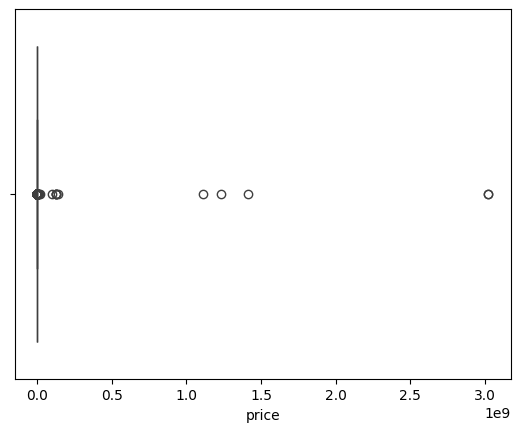

In [24]:
#NaNs and duplciates have been removed. Data has been cleaned.
vehicles_df.head()
vehicles_df.nunique()
vehicles_df.dtypes
sns.boxplot(vehicles_df, x="price")

In [25]:
# Calculate Q1, Q3, and IQR for the 'price' column
Q1 = vehicles_df['price'].quantile(0.25)
Q3 = vehicles_df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
vehicles_df_no_outliers = vehicles_df[
    (vehicles_df['price'] >= lower_bound) & (vehicles_df['price'] <= upper_bound)
]

# Print the number of rows before and after outlier removal
print(f"Number of rows before outlier removal: {len(vehicles_df)}")
print(f"Number of rows after outlier removal: {len(vehicles_df_no_outliers)}")

Number of rows before outlier removal: 247575
Number of rows after outlier removal: 244043


<Axes: xlabel='price'>

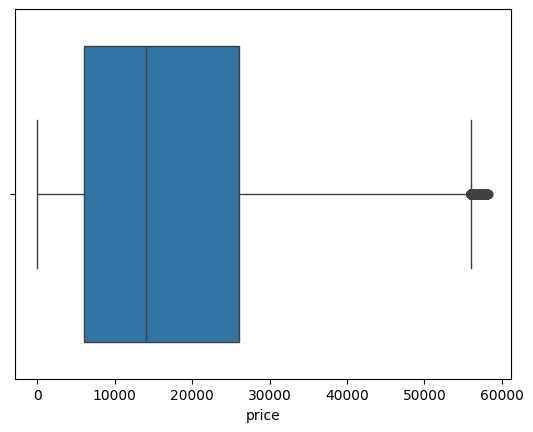

In [26]:
vehicles_df = vehicles_df_no_outliers
sns.boxplot(vehicles_df, x="price")

<Axes: xlabel='price', ylabel='Count'>

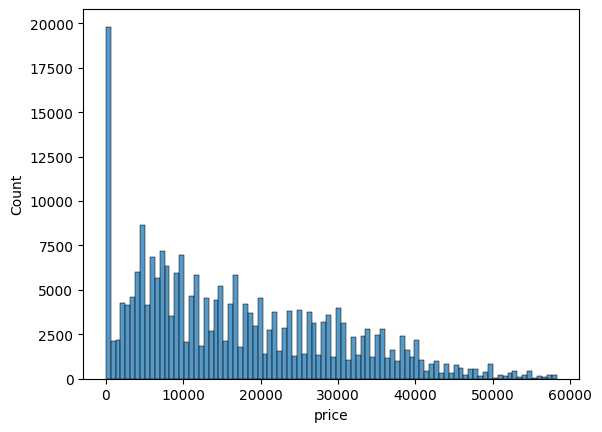

In [27]:
sns.histplot(vehicles_df, x="price")

<Axes: xlabel='price', ylabel='Count'>

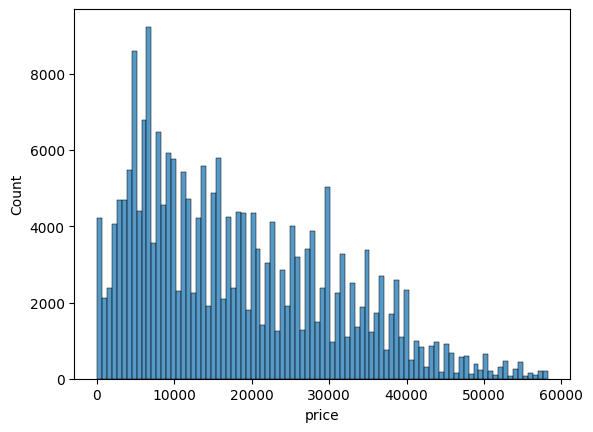

In [28]:
#Cars with a price of 0 would not be useful information to used car dealerships. We can remove those
vehicles_df = vehicles_df[vehicles_df['price'] > 0]
sns.histplot(vehicles_df, x="price")

<Axes: xlabel='price', ylabel='Count'>

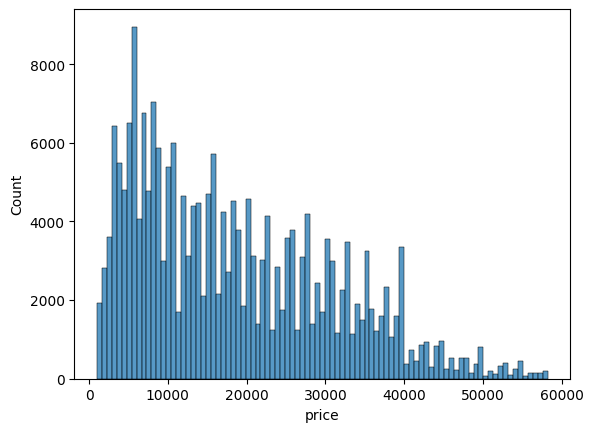

In [29]:
#Still have a large amount of cars < $1000. Going to remove those to focus on larger amounts.
vehicles_df = vehicles_df[vehicles_df['price'] > 1000]
sns.histplot(vehicles_df, x="price")

In [30]:
#Now that price is looking better, lets look at the other numerical feature: 'odometer'
vehicles_df['odometer'].describe()

,odometer
count,2.226200e+05
mean,9.614439e+04
std,1.687376e+05
min,0.000000e+00
25%,3.692600e+04
50%,8.637600e+04
75%,1.360500e+05
max,1.000000e+07


<Axes: xlabel='odometer', ylabel='Count'>

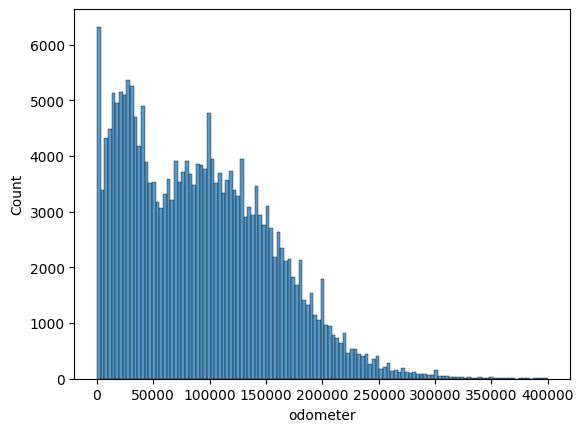

In [31]:
#Some models of cars can exceed 300,000 miles.
#Cars usually do not exceed 400,000 miles. Lets use that as our threshold.
vehicles_df = vehicles_df[vehicles_df['odometer'] < 400000]
sns.histplot(vehicles_df, x="odometer")

In [32]:
#The model column likely needs some cleanup.
#Let's see how many unique valuesare present in the data.
vehicles_df['model'].value_counts()

,count
model,
f-150,3916
silverado 1500,2586
1500,2043
camry,1694
accord,1649
...,...
500l trekking hatchback 4d,1
chevette,1
f 100 style side,1


In [33]:
#With many columns being one-off unique values.
#Lets define a threshold and lump everything into an 'other' column.
#Lets try a threshold of 200 and see how many values are remaining.
threshold = 200
value_counts = vehicles_df['model'].value_counts()
to_replace = value_counts[value_counts <= threshold].index
vehicles_df['model'] = vehicles_df['model'].replace(to_replace, 'other')

In [34]:
vehicles_df['model'].value_counts()
#We are now down to 254 unique models. This is more manageable.

,count
model,
other,127354
f-150,3916
silverado 1500,2586
1500,2043
camry,1694
...,...
mkz,209
transit connect,209
f150 super cab xlt pickup,206


In [35]:
vehicles_df['manufacturer'].value_counts()

,count
manufacturer,
ford,37129
chevrolet,29675
toyota,18796
honda,12043
nissan,10063
jeep,9919
gmc,8765
bmw,8451
ram,8146


In [36]:
vehicles_df['type'].value_counts()

,count
type,
sedan,94141
SUV,39085
pickup,24250
truck,14504
other,12264
coupe,10668
hatchback,9657
wagon,5672
convertible,4361


In [37]:
vehicles_df['drive'].value_counts()

,count
drive,
4wd,132053
fwd,58053
rwd,32029


In [38]:
vehicles_df['transmission'].value_counts()

,count
transmission,
automatic,167184
other,42867
manual,12084


In [39]:
vehicles_df['state'].value_counts()

,count
state,
ca,33352
fl,19913
ny,14620
mi,13132
oh,12635
nc,9954
co,8412
il,7917
nj,7581


In [40]:
vehicles_df['paint_color'].value_counts()

,count
paint_color,
white,101473
black,34925
silver,24126
blue,17615
red,16907
grey,13424
green,3993
brown,3777
custom,3461


In [41]:
vehicles_df['fuel'].value_counts()

,count
fuel,
gas,189576
other,17744
diesel,10683
hybrid,3114
electric,1018


In [42]:
import matplotlib.pyplot as plt

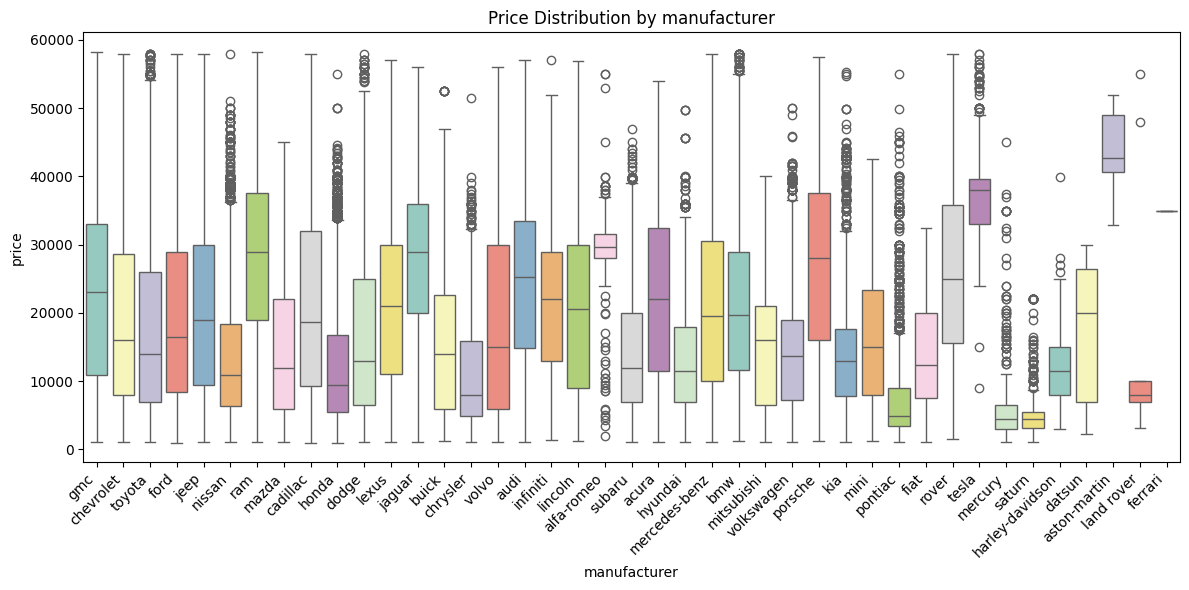

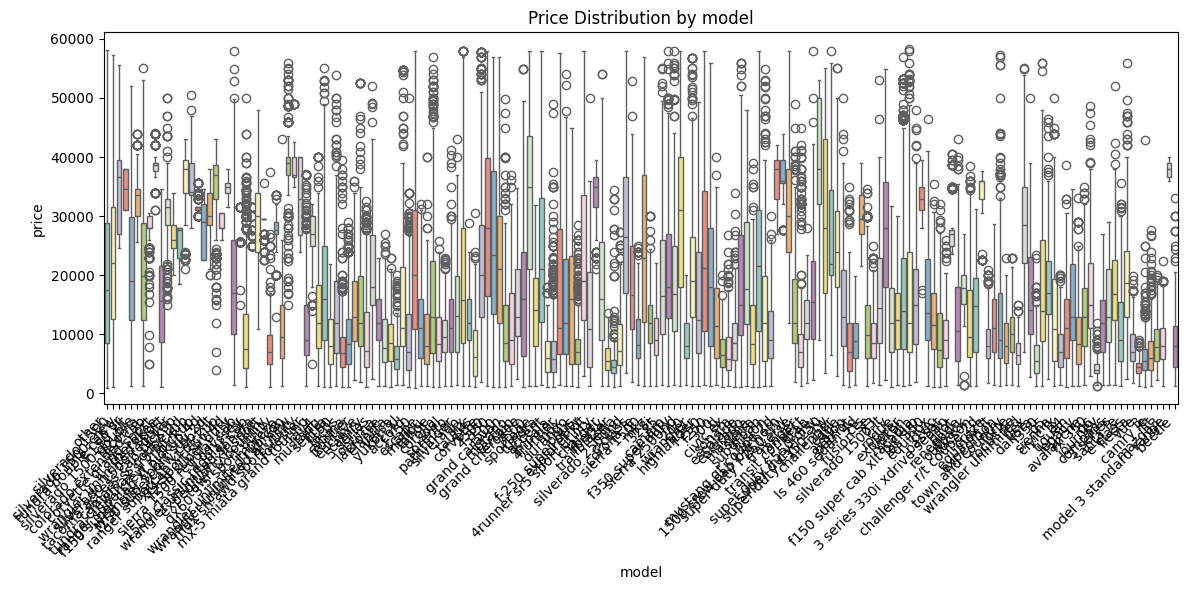

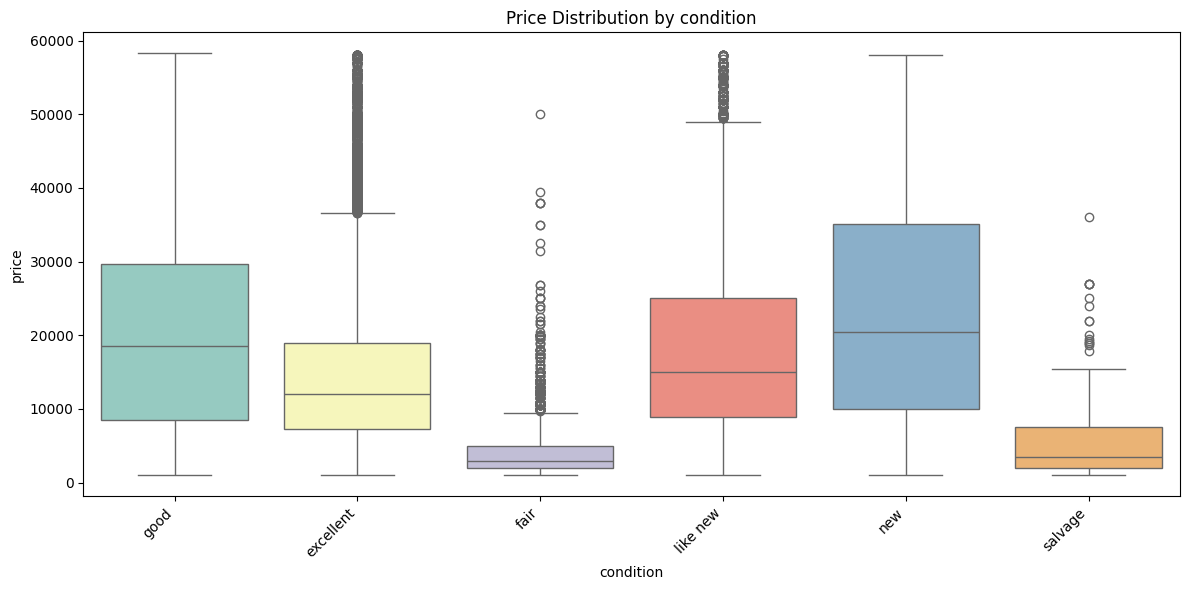

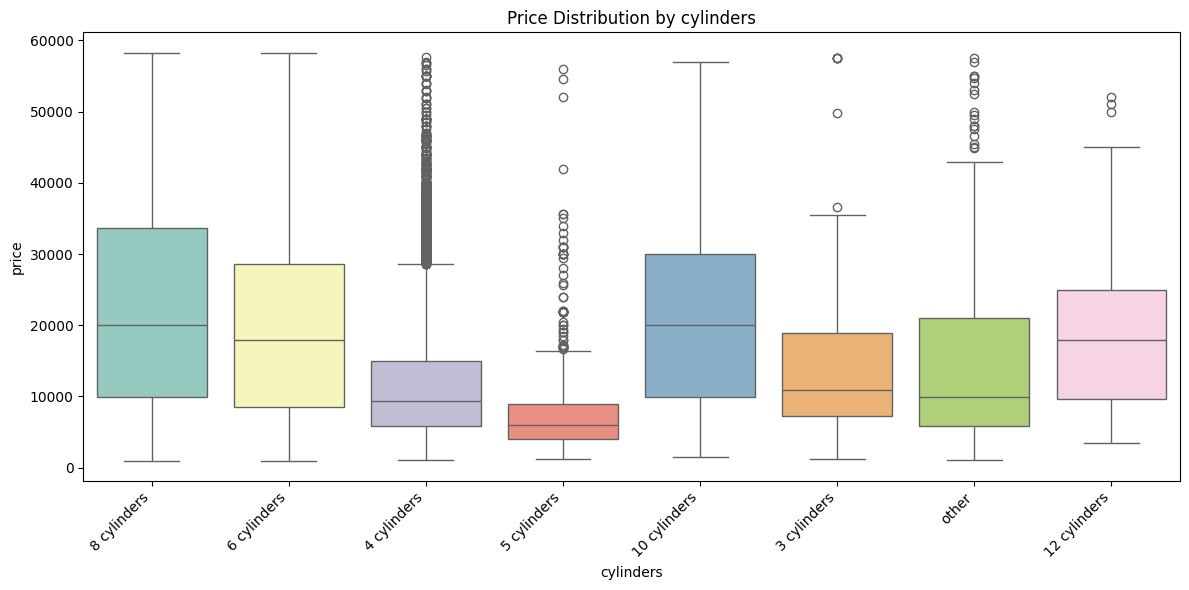

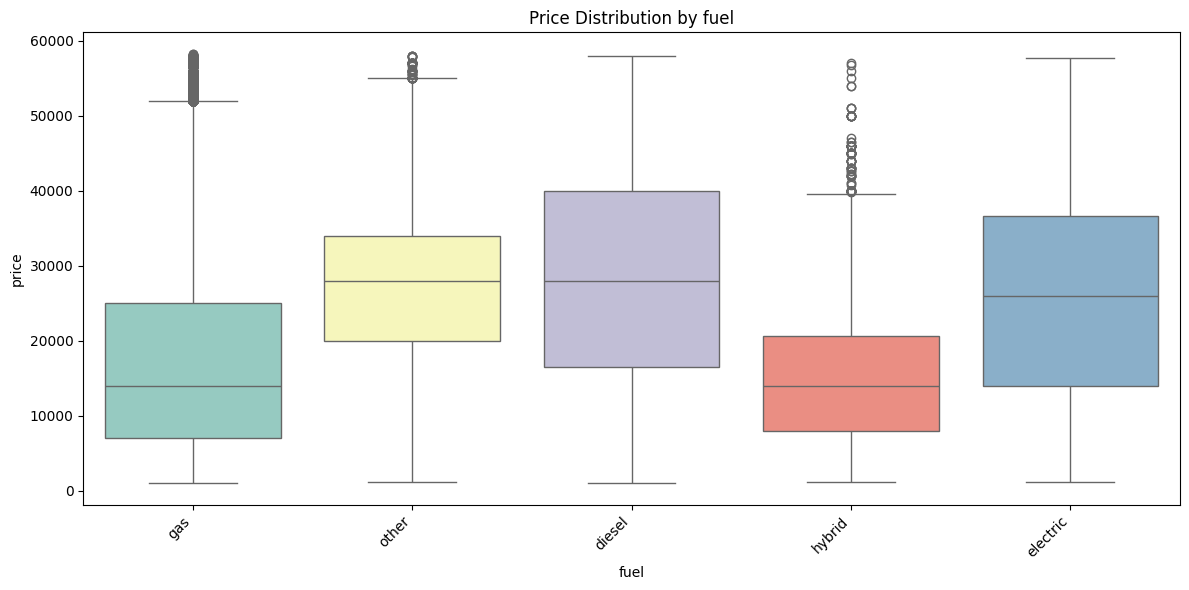

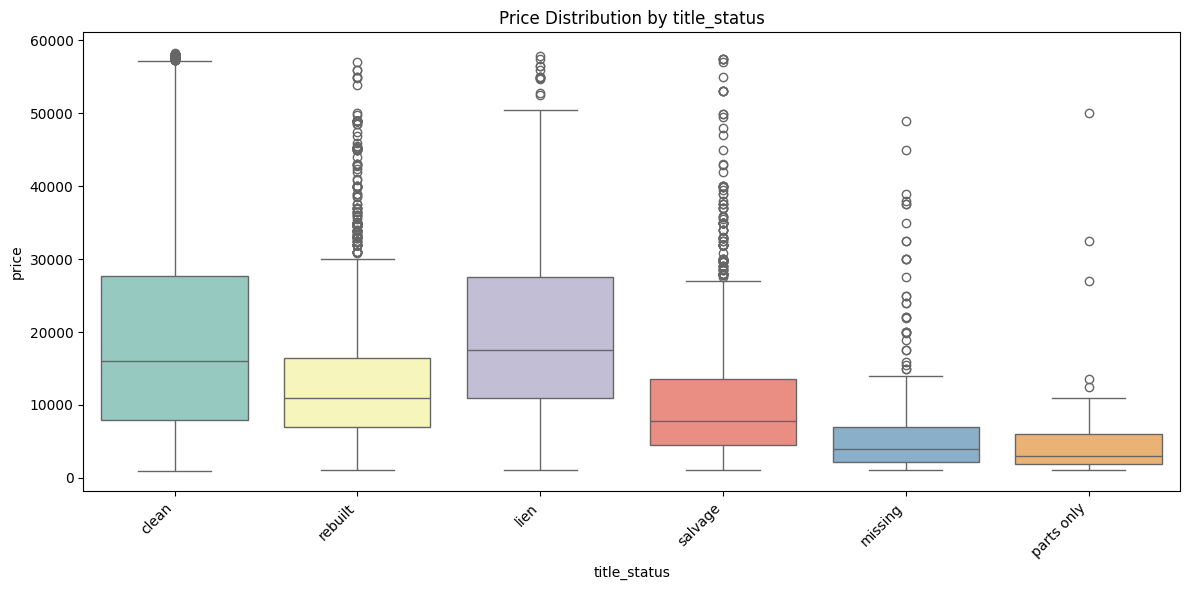

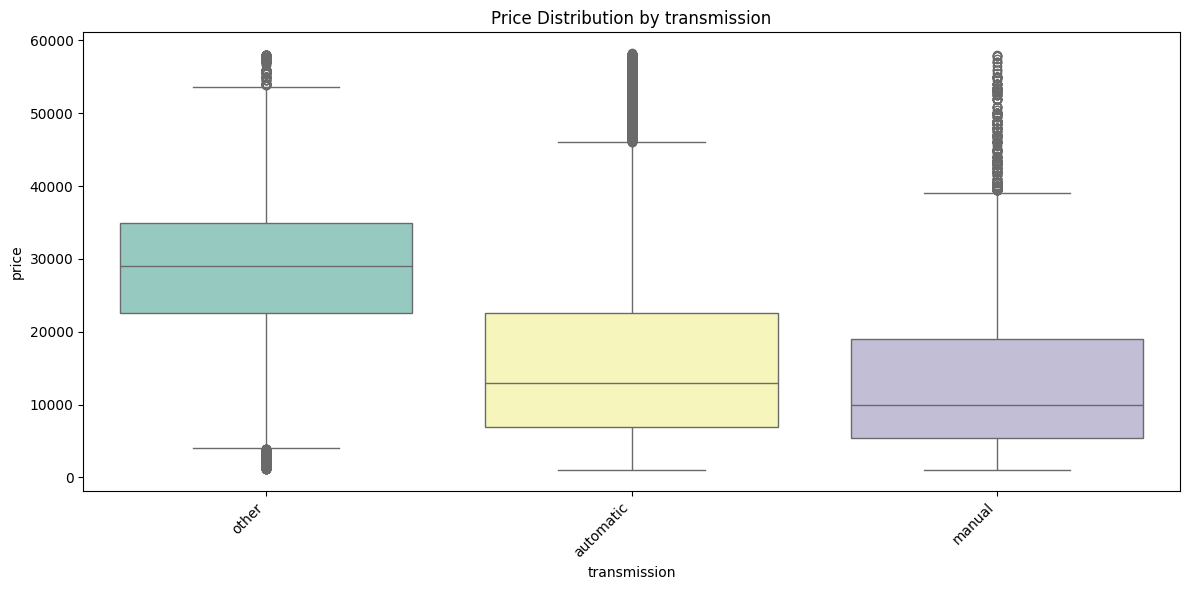

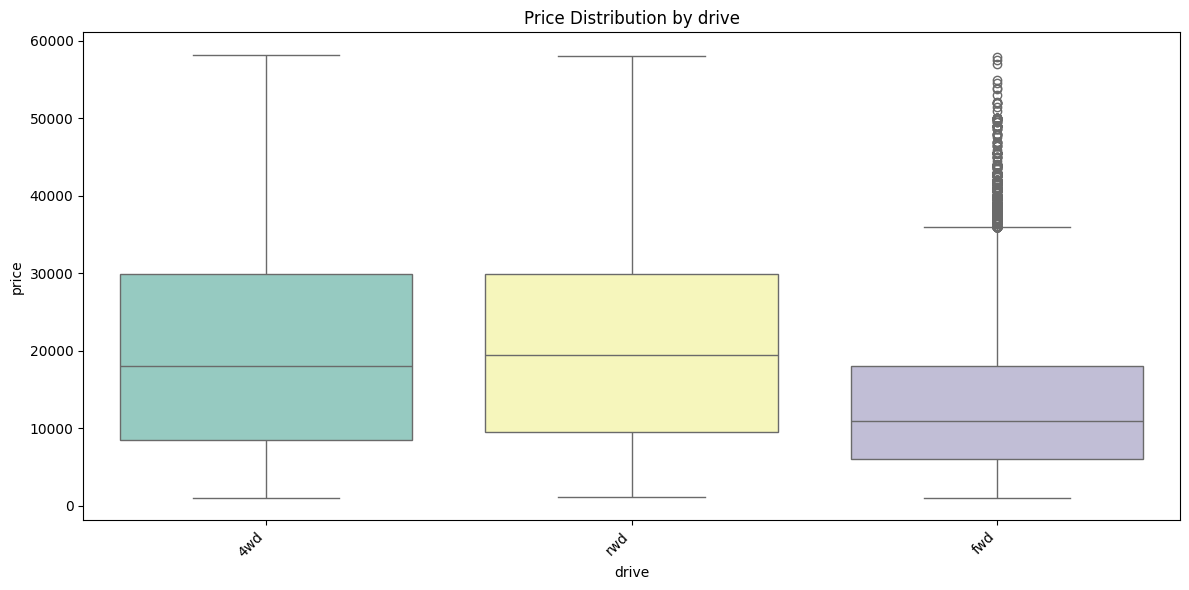

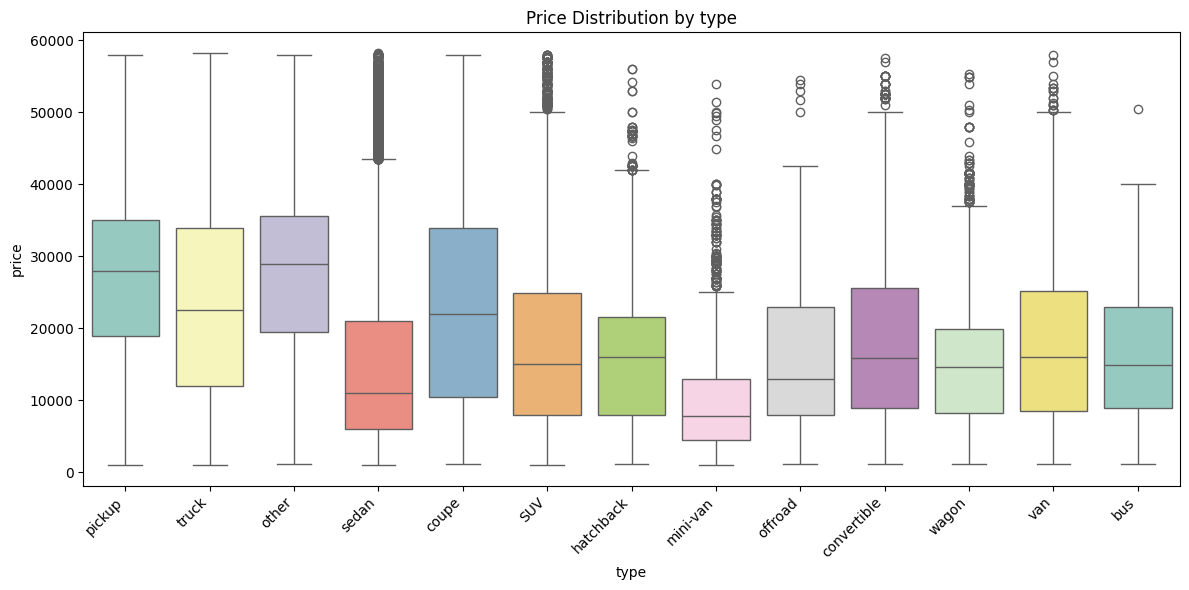

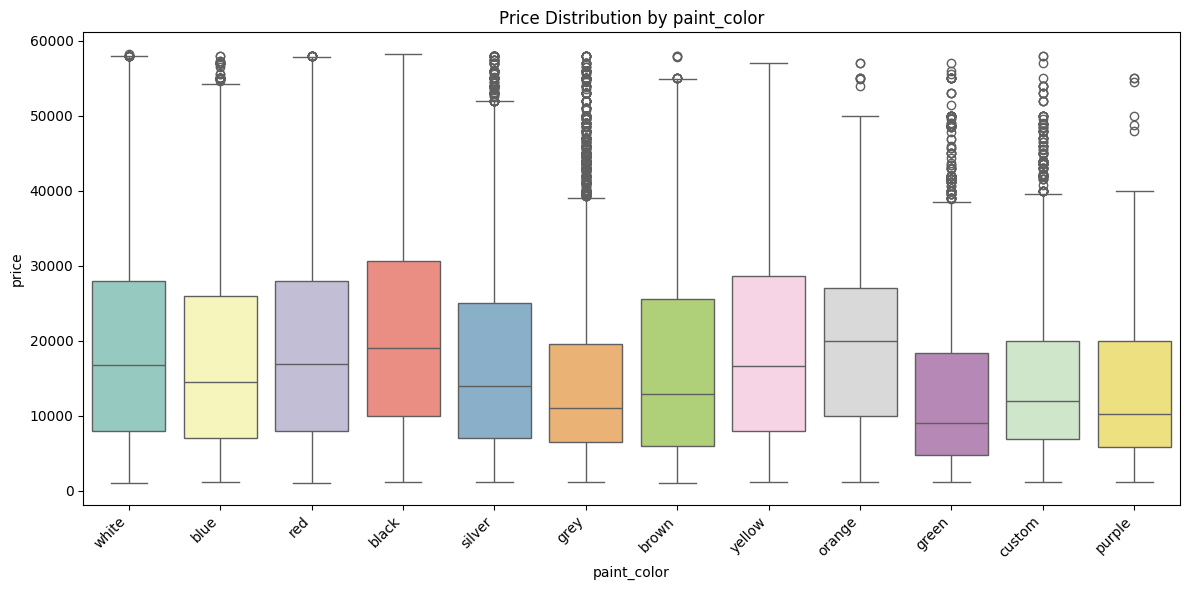

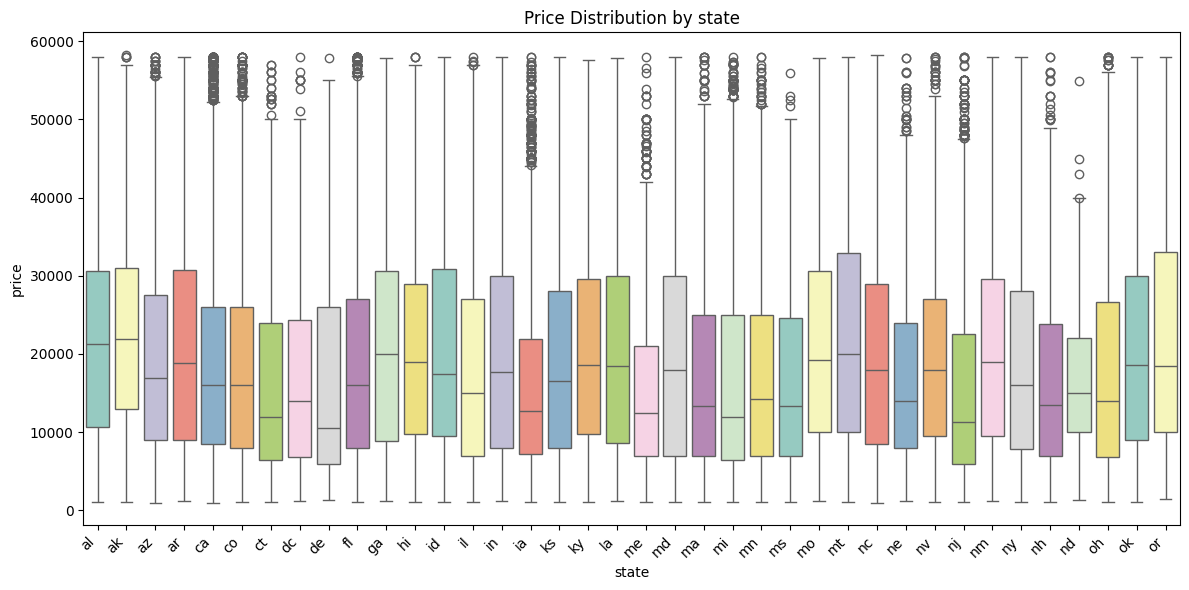

In [43]:
# prompt: #Let's plot out each categorical column in relation to price using a loop

# Iterate through categorical columns and create boxplots
categorical_cols = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']

for col in categorical_cols:
    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    sns.boxplot(x=col, y='price', data=vehicles_df, hue=col, palette='Set3')
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout() # Prevents labels from overlapping
    plt.show()


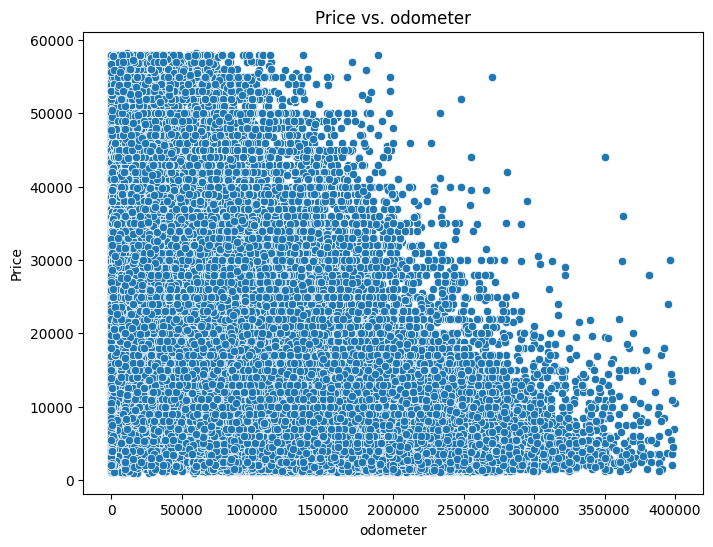

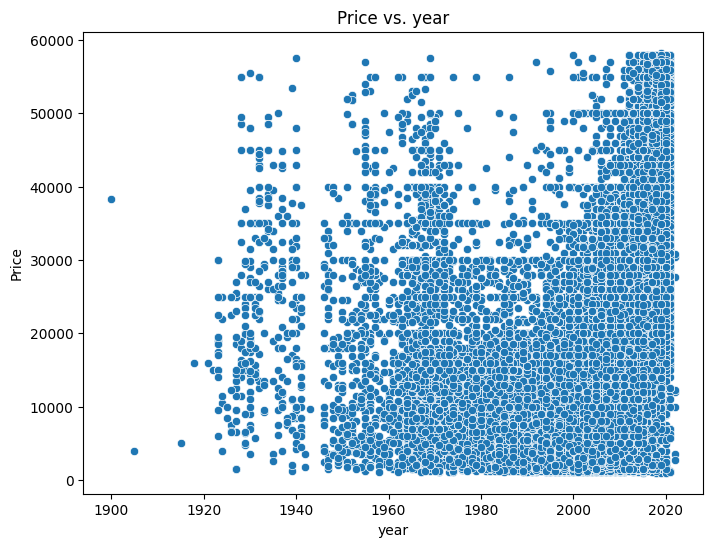

In [44]:
# prompt: Now let's plot out each numerical column in relation to price using a loop

# Iterate through numerical columns and create scatterplots
numerical_cols = ['odometer', 'year']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='price', data=vehicles_df)
    plt.title(f'Price vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()


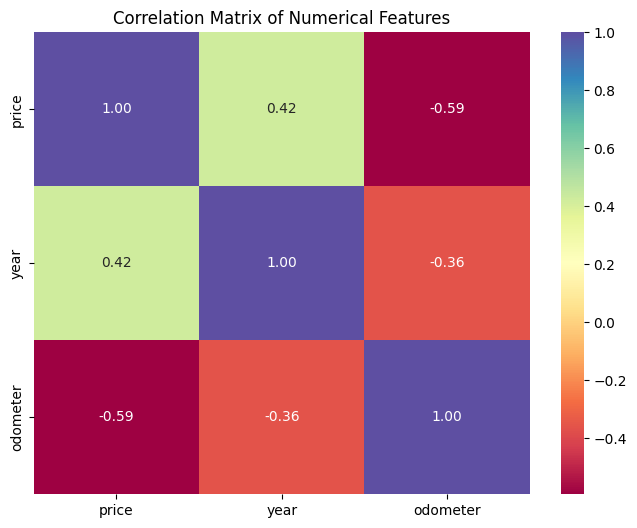

In [45]:
# prompt: Now lets create a Correlation Analysis with the numerical columns

# Create a correlation matrix for numerical features
correlation_matrix = vehicles_df[['price', 'year', 'odometer']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

In [47]:
#split data into train and test sets

# Define features (X) and target (y)
X = vehicles_df.drop('price', axis=1)
y = vehicles_df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44427 entries, 292285 to 21296
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        44427 non-null  object 
 1   year          44427 non-null  float64
 2   manufacturer  44427 non-null  object 
 3   model         44427 non-null  object 
 4   condition     44427 non-null  object 
 5   cylinders     44427 non-null  object 
 6   fuel          44427 non-null  object 
 7   odometer      44427 non-null  float64
 8   title_status  44427 non-null  object 
 9   transmission  44427 non-null  object 
 10  drive         44427 non-null  object 
 11  type          44427 non-null  object 
 12  paint_color   44427 non-null  object 
 13  state         44427 non-null  object 
dtypes: float64(2), object(12)
memory usage: 5.1+ MB


In [49]:
categorical_features = ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
numerical_features = ['year', 'odometer']
print ( categorical_features, numerical_features)


['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color'] ['year', 'odometer']


In [59]:
# prompt: Now that we have split the data lets us write some pre processors to process the data which will be used in the pipeline.

# Assuming X_train, X_test, y_train, y_test, categorical_features, and numerical_features are defined from the previous code

# Create the preprocessor
preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_features), # handle_unknown='ignore' added
    (StandardScaler(), numerical_features)
)

# Create the pipeline
linear_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'model__fit_intercept': [True, False]
}


In [60]:
grid_search = GridSearchCV(linear_pipe, param_grid = param_grid, cv = 5).fit(X_train, y_train)

In [61]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters:", best_params)
print("Best R-squared score (on training data):", best_score)

Best parameters: {'model__fit_intercept': True}
Best R-squared score (on training data): 0.6551430099168668


Mean Squared Error: 53975308.53441082
Root Mean Squared Error: 7346.788994820174


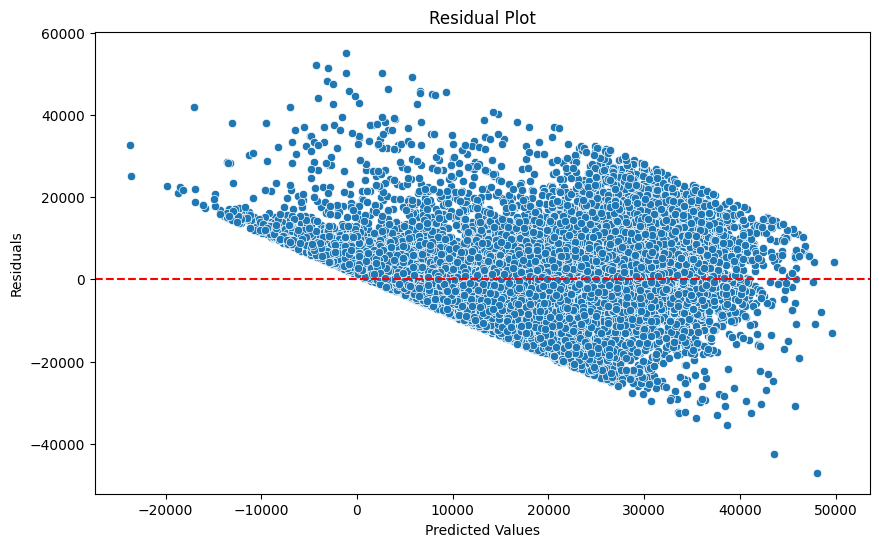

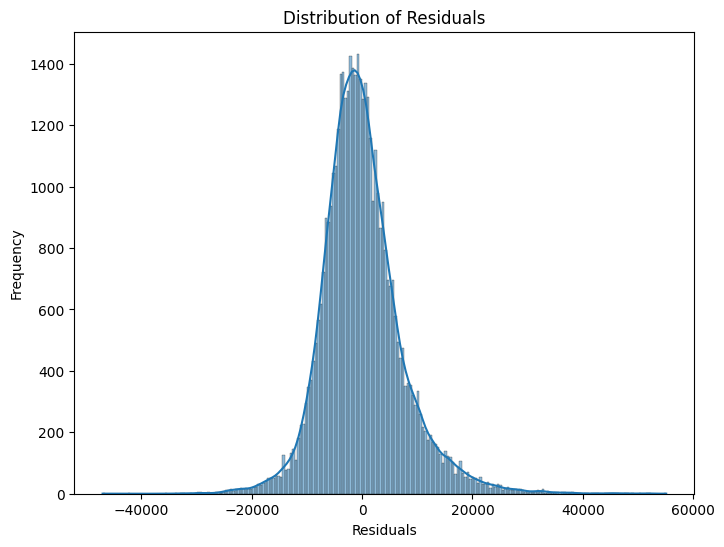

In [62]:
# Fit the best model on the entire training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = best_model.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Analyze the residuals
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Create a histogram of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


In [63]:
#Now we will see which features most largely affects the price of a car.
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Get feature importances
importance_scores = result.importances_mean

# Create a DataFrame to display the results
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': importance_scores
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
importance_df


,Feature,Importance
7,odometer,0.491007
1,year,0.137169
6,fuel,0.080096
2,manufacturer,0.060965
11,type,0.053771
5,cylinders,0.035459
10,drive,0.029613
8,title_status,0.007021
9,transmission,0.005366
4,condition,0.003662


# **This shows us that the largest factors that affect price are Odometer, and Year.**